In [1]:
# Mini Project 1 - Georgia Microbiome Data Set

In [34]:
#from flask import Flask, request, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2, venn2_circles
#from matplotlib_venn import venn3, venn3_circles
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
from io import BytesIO
import base64

In [35]:
df = pd.read_csv("Combined_30.csv", sep='\t')

#kunlin = "G:\\MAC_Research_Data\\UGA\\3Fall\\DataMining6380\\Mini_project_1\\Combined_30_Comma.csv"
#Corey = 
#print(df.head())
df.describe()

,Unnamed: 0,345dcc18d51f44572bd67c08e5e95b8b,074e66f75650948b8df12cfe2ffb5f37,060fdbbfa61cbfb4d47350dc2a2019cd,d2208d27b5df4c53eb547f7ac45f4d6b,574d164310944193d8fc13dc10346e58,8cb92babedb9f4ff7bedee4ac4f47370,3e00a33b844a56c2e00acedeffc43b5e,0f5f7693288de84f4ade2e6abaa2440f,561ed5d9dab98c645f731a40b7b63fa4,...,Ni_ppm,P_ppm,Pb_ppm,Zn_ppm,Organic_Matter_perc,N_perc,Sampling_NumberGDD,Plate,Column,Concentration
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,430.000000,430.000000,430.000000,430.000000
mean,214.500000,149.876744,144.055814,116.130233,109.718605,63.360465,57.406977,54.679070,52.476744,52.316279,...,1.295379,44.257213,0.420978,3.843399,2.373716,0.077286,112485.348837,3.486047,6.374419,154.523260
std,124.274562,1317.063962,1197.805208,319.389316,1125.998755,293.785315,621.302763,355.882539,199.041065,359.958574,...,0.919606,34.332825,0.302821,2.836830,1.301624,0.051246,124749.996498,1.846951,3.450184,135.457650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025000,4.300000,0.010000,0.015000,0.580000,0.010000,1600.000000,1.000000,1.000000,13.566667
25%,107.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.590000,19.390000,0.180000,1.740000,1.300000,0.040000,15600.000000,2.000000,3.000000,70.041667
50%,214.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.110000,34.300000,0.340000,2.890000,2.430000,0.070000,36900.000000,4.000000,6.000000,104.216667
75%,321.750000,7.000000,2.000000,59.750000,0.000000,0.000000,0.000000,3.000000,12.750000,0.000000,...,1.740000,65.890000,0.640000,5.140000,3.040000,0.100000,241400.000000,5.000000,9.000000,184.000000
max,429.000000,24687.000000,20147.000000,2817.000000,20885.000000,3329.000000,11022.000000,5522.000000,2533.000000,3977.000000,...,4.090000,154.870000,1.170000,10.720000,5.730000,0.230000,371400.000000,6.000000,12.000000,863.333333


In [60]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df = df.drop(['PlantA_Or_B','Notes','Location','Date_Taken','GA_Microbiome','Living_Mulch','Endophyte','R1_Fastq_Name','R2_Fastq_Name','Sample_or_Control','Sampling_Number','Plate','Row','Column','Well','Soil_Test_Number','Living_Mulch_Treatment','reads','quant_reading','Concentration'], axis =1)
print(df.head())
#df.describe()

KeyError: "['PlantA_Or_B' 'Notes' 'Location' 'Date_Taken' 'GA_Microbiome'\n 'Living_Mulch' 'Endophyte' 'R1_Fastq_Name' 'R2_Fastq_Name'\n 'Sample_or_Control' 'Sampling_Number' 'Plate' 'Row' 'Column' 'Well'\n 'Soil_Test_Number' 'Living_Mulch_Treatment' 'reads' 'quant_reading'\n 'Concentration'] not found in axis"

In [37]:
# drop rows with NA's
print("Rows Before Dropping NAs: " + str(len(df.index)))
df = df.dropna(axis=0, how='any')
print("Rows After Dropping NAs: " + str(len(df.index)))

Rows Before Dropping NAs: 430
Rows After Dropping NAs: 409


In [38]:
# Parse Data Set - Sample Type is Label of interest
Y = np.array(df['Sample_Type'])
X = df.drop(columns=['Sample_Type'])

train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 18)

In [39]:
# Classifiers:
# miss cm matrix 
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_features,train_labels)
y_pred = clf_dt.predict(test_features)
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 1)
clf_rf.fit(train_features,train_labels)
y_pred = clf_rf.predict(test_features)
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

#Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features,train_labels)
y_pred = clf_nb.predict(test_features)
print('Gaussian NB Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

Decision Tree Accuracy: 0.7669902912621359


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest Accuracy: 0.7572815533980582
Gaussian NB Accuracy: 0.8058252427184466


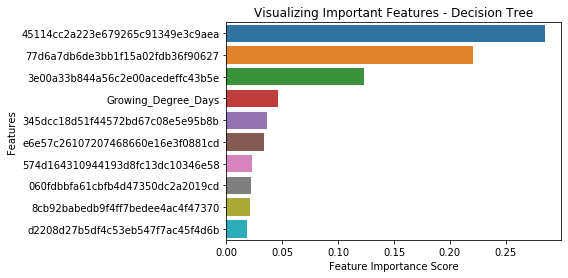

This data set doesn't contain taxonomy of OTUs which would give us the biological relevance


In [40]:
# make figure of top 10 features, importances - Decision Tree had best accuracy

feature_list = list(X.columns)
feature_imp = pd.Series(clf_dt.feature_importances_,index=feature_list).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features - Decision Tree")
plt.show()
print("This data set doesn't contain taxonomy of OTUs which would give us the biological relevance")

In [41]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
X = X.to_numpy()
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 18)
min_max_scaler = MinMaxScaler()
train_features= min_max_scaler.fit_transform(train_features)
test_features =  min_max_scaler.fit_transform(test_features)

In [42]:
# K fold cross validation decision Tree
from sklearn.model_selection import StratifiedKFold
from sklearn import tree 

treescores = []
clf_dt = DecisionTreeClassifier()
k_fold = StratifiedKFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X,Y):
    clf_dt.fit(X[train_indices], Y[train_indices]) 
    predicted = clf_dt.predict(X[test_indices])
    treescores.append(metrics.accuracy_score(Y[test_indices], predicted))
    
for i in treescores:
    print("each fold accuracy:", i)


each fold accuracy: 0.75
each fold accuracy: 0.7045454545454546
each fold accuracy: 0.8333333333333334
each fold accuracy: 0.825
each fold accuracy: 0.75
each fold accuracy: 0.775
each fold accuracy: 0.8
each fold accuracy: 0.725
each fold accuracy: 0.725
each fold accuracy: 0.7692307692307693


In [43]:
# K fold cross validation RandomForest
from sklearn.model_selection import StratifiedKFold
randomscores = []
clf_rf = RandomForestClassifier(n_estimators=1000, max_features = 'sqrt',n_jobs=-1, verbose = 1)
k_fold = StratifiedKFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X,Y):
    clf_rf.fit(X[train_indices], Y[train_indices]);
    predicted = clf_rf.predict(X[test_indices]);
    randomscores.append(metrics.accuracy_score(Y[test_indices], predicted))
    
for i in randomscores:
    print("each fold accuracy:", i)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.

each fold accuracy: 0.75
each fold accuracy: 0.75
each fold accuracy: 0.8095238095238095
each fold accuracy: 0.675
each fold accuracy: 0.775
each fold accuracy: 0.85
each fold accuracy: 0.725
each fold accuracy: 0.775
each fold accuracy: 0.7
each fold accuracy: 0.717948717948718


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [44]:
# K fold cross validation Native Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
naive_bayes_scores = []
clf_nb = GaussianNB()
k_fold = StratifiedKFold(n_splits=10)
for train_indices, test_indices in k_fold.split(X,Y):
    clf_nb.fit(X[train_indices], Y[train_indices]);
    predicted = clf_nb.predict(X[test_indices]);
    naive_bayes_scores.append(metrics.accuracy_score(Y[test_indices], predicted))
    
for i in naive_bayes_scores:
    print("each fold accuracy:", i)


each fold accuracy: 0.7727272727272727
each fold accuracy: 0.7272727272727273
each fold accuracy: 0.7619047619047619
each fold accuracy: 0.825
each fold accuracy: 0.875
each fold accuracy: 0.875
each fold accuracy: 0.75
each fold accuracy: 0.7
each fold accuracy: 0.75
each fold accuracy: 0.717948717948718


In [45]:
# Statistic analysis

from scipy import stats
from scipy.stats import f_oneway
# perform pair sample t test
# three scores to compare naive_bayes_scores, randomscores, treescores
threescore = np.column_stack((naive_bayes_scores,randomscores,treescores))
pvalue_compare_threemodels = f_oneway(naive_bayes_scores,randomscores,treescores )
if pvalue_compare_threemodels.pvalue < 0.05:
    print ("Among three models, there is at least one model with a statistically significant different performance")
else:
    print(f"The performance of three models is not statisically significant different and p valus is {pvalue_compare_threemodels.pvalue}")

accuracy = pd.DataFrame({"Naive_Bayes":naive_bayes_scores,"Randomforest":randomscores,"DecisionTree":treescores})    
print("The accuracy scores for each model")
print(accuracy)
naive_intervalupper = np.mean(naive_bayes_scores)+1.96*np.std(naive_bayes_scores,ddof=1)
naive_intervallower = np.mean(naive_bayes_scores)-1.96*np.std(naive_bayes_scores,ddof=1)
random_intervalupper = np.mean(randomscores)+1.96*np.std(randomscores,ddof=1)
random_intervalower = np.mean(randomscores)-1.96*np.std(randomscores,ddof=1)
decision_intervalupper = np.mean(treescores)+1.96*np.std(treescores,ddof=1)
decision_intervalower = np.mean(treescores)-1.96*np.std(treescores,ddof=1)

print ("The mean accurcay")
print(f" naive_bayes,'\t'  randomforest,'\t' decisionTree")
print(np.mean(naive_bayes_scores),np.mean(randomscores),np.mean(treescores))
print("The std of the accuracy")
print(f" naive_bayes,'\t'  randomforest,'\t' decisionTree")
print(np.std(naive_bayes_scores),np.std(randomscores),np.std(treescores))

Interval95 = pd.DataFrame({"Naive_Bayes":[naive_intervallower,naive_intervalupper],
                           "Randomforest":[random_intervalower,random_intervalupper],
                           "DecisionTree":[decision_intervalower,decision_intervalupper]},
                         index = ["Lower","Upper"])

print("The 95% confidience interval of the accuracy scores for each model")
print(Interval95,sep ="\t")


The performance of three models is not statisically significant different and p valus is 0.6365998378290466
The accuracy scores for each model
   Naive_Bayes  Randomforest  DecisionTree
0     0.772727      0.750000      0.750000
1     0.727273      0.750000      0.704545
2     0.761905      0.809524      0.833333
3     0.825000      0.675000      0.825000
4     0.875000      0.775000      0.750000
5     0.875000      0.850000      0.775000
6     0.750000      0.725000      0.800000
7     0.700000      0.775000      0.725000
8     0.750000      0.700000      0.725000
9     0.717949      0.717949      0.769231
The mean accurcay
 naive_bayes,'	'  randomforest,'	' decisionTree
0.7754853479853481 0.7527472527472527 0.7657109557109556
The std of the accuracy
 naive_bayes,'	'  randomforest,'	' decisionTree
0.05923009055289108 0.04949231718639238 0.04112425238057802
The 95% confidience interval of the accuracy scores for each model
       Naive_Bayes  Randomforest  DecisionTree
Lower     0.653

In [46]:
# Classifiers with Scaled Data:
Y = np.array(df['Sample_Type'])
X = df.drop(columns=['Sample_Type'])

from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
X = X.to_numpy()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

train_features, test_features, train_labels, test_labels = train_test_split(scaled_X, Y, test_size = 0.25, random_state = 18)
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_features,train_labels)
y_pred = clf_dt.predict(test_features)
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 1)
clf_rf.fit(train_features,train_labels)
y_pred = clf_rf.predict(test_features)
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

#Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features,train_labels)
y_pred = clf_nb.predict(test_features)
print('Gaussian NB Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred)))

Decision Tree Accuracy: 0.7378640776699029


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest Accuracy: 0.7572815533980582
Gaussian NB Accuracy: 0.8252427184466019


In [47]:
# T test to compare classifiers: Random Forest and Decision Tree - Data Scaled
from scipy.stats import ttest_rel, ttest_ind

# Classifiers with Scaled Data:
Y = np.array(df['Sample_Type'])
X = df.drop(columns=['Sample_Type'])

from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
X = X.to_numpy()
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

train_features, test_features, train_labels, test_labels = train_test_split(scaled_X, Y, test_size = 0.25, random_state = 18)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 1)
clf_rf.fit(train_features,train_labels)
# Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features,train_labels)
repeats = 10;
cv = 10; 
scores = [] # to store scores of each run+fold. 

# for run and fold, fit the models and store performance on the test set. 
for i in range(repeats):
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True)
    for train_indices, test_indices in k_fold.split(scaled_X,Y):
        clf_rf.fit(scaled_X[train_indices], Y[train_indices]) 
        clf_nb.fit(scaled_X[train_indices],    Y[train_indices])     
        predictedForest =  clf_rf.predict(scaled_X[test_indices])
        predictedGaussianNB = clf_nb.predict(scaled_X[test_indices])
        scores.append(
        [metrics.accuracy_score(Y[test_indices], predictedForest), metrics.accuracy_score(Y[test_indices], predictedGaussianNB
                                   )])
scores = np.array(scores);

# print out average accuracy over all of the runs and folds for each classifier.")
print("Data was Scaled:")
print("Accuracy: Forest={:.3f}+/-{:.3f} NBG={:.3f}+/-{:.3f}".format(np.mean(scores[:,0]),np.std(scores[:,0]),np.mean(scores[:,1]),np.std(scores[:,1]),))

# print out the results of simple paried t-test
print("Results of simple paired t-test")
(tval, pval) = ttest_rel(scores[:,0], scores[:,1])
print("\nt-value {}, p-value {}".format(tval, pval))

# corrected resampled t-statistic (assumes we use repeated train/test splits or repeated cross-validation). 
import math

from scipy.stats import norm,t, binom
dist = norm(0,1)

diff = scores[:,0]-scores[:,1]
k = len(diff)
variance = np.var(diff,ddof=1)
foldcount = 10;
test_size = math.floor(df.shape[0]/foldcount);
train_size = math.floor(df.shape[0]-test_size);
tval = np.mean(diff)/math.sqrt(variance*(1/k+ test_size/train_size))
pval = dist.cdf(tval)*2
print("Corrected Resampled t-statistic:")
print("\nt-value {}, p-value {}".format(tval, pval))

# Scaled Kappa Scores
from sklearn.metrics import cohen_kappa_score
print("Scaled Kappa - Random Forest: " + str(cohen_kappa_score(Y[test_indices], predictedForest)))
print("Scaled Kappa - GaussianNB: " + str(cohen_kappa_score(Y[test_indices], predictedGaussianNB)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Data was Scaled:
Accuracy: Forest=0.764+/-0.060 NBG=0.836+/-0.047
Results of simple paired t-test

t-value -12.16363956059696, p-value 2.2954833780823e-21
Corrected Resampled t-statistic:

t-value -3.534969761460346, p-value 0.000407821824742817
Scaled Kappa - Random Forest: 0.7331052181351583
Scaled Kappa - GaussianNB: 0.8668941979522184


In [48]:
# T test to compare classifiers: Random Forest and Decision Tree - Data Not Scaled
from scipy.stats import ttest_rel, ttest_ind

# Classifiers with Scaled Data:
Y = np.array(df['Sample_Type'])
X = df.drop(columns=['Sample_Type'])

#from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
X = X.to_numpy()
#scaler = MinMaxScaler()
#scaled_X = scaler.fit_transform(X)

train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 18)

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 1)
clf_rf.fit(train_features,train_labels)
# Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features,train_labels)
repeats = 10;
cv = 10; 
scores = [] # to store scores of each run+fold. 

# for run and fold, fit the models and store performance on the test set. 
for i in range(repeats):
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True)
    for train_indices, test_indices in k_fold.split(X,Y):
        clf_rf.fit(X[train_indices], Y[train_indices]) 
        clf_nb.fit(X[train_indices],    Y[train_indices])     
        predictedForest =  clf_rf.predict(X[test_indices])
        predictedGaussianNB = clf_nb.predict(X[test_indices])
        scores.append(
        [metrics.accuracy_score(Y[test_indices], predictedForest), metrics.accuracy_score(Y[test_indices], predictedGaussianNB
                                   )])
scores = np.array(scores);

# print out average accuracy over all of the runs and folds for each classifier.")
print("Data was not Scaled:")
print("Accuracy: Forest={:.3f}+/-{:.3f} NBG={:.3f}+/-{:.3f}".format(np.mean(scores[:,0]),np.std(scores[:,0]),np.mean(scores[:,1]),np.std(scores[:,1]),))

# print out the results of simple paried t-test
print("Results of simple paired t-test")
(tval, pval) = ttest_rel(scores[:,0], scores[:,1])
print("\nt-value {}, p-value {}".format(tval, pval))

# corrected resampled t-statistic (assumes we use repeated train/test splits or repeated cross-validation). 
import math

from scipy.stats import norm,t, binom
dist = norm(0,1)

diff = scores[:,0]-scores[:,1]
k = len(diff)
variance = np.var(diff,ddof=1)
foldcount = 10;
test_size = math.floor(df.shape[0]/foldcount);
train_size = math.floor(df.shape[0]-test_size);
tval = np.mean(diff)/math.sqrt(variance*(1/k+ test_size/train_size))
pval = dist.cdf(tval)*2
print("Corrected Resampled t-statistic:")
print("\nt-value {}, p-value {}".format(tval, pval))

# Unscaled Kappa Scores
from sklearn.metrics import cohen_kappa_score
print("Unscaled Kappa - Random Forest: " + str(cohen_kappa_score(Y[test_indices], predictedForest)))
print("Unscaled Kappa - GaussianNB: " + str(cohen_kappa_score(Y[test_indices], predictedGaussianNB)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Data was not Scaled:
Accuracy: Forest=0.760+/-0.056 NBG=0.784+/-0.059
Results of simple paired t-test

t-value -3.9682722909519987, p-value 0.00013715497887885176
Corrected Resampled t-statistic:

t-value -1.1532504300109205, p-value 0.2488076097980827
Unscaled Kappa - Random Forest: 0.6355140186915889
Unscaled Kappa - GaussianNB: 0.6689303904923599


In [55]:
# Model Evaluation

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from io import BytesIO
import base64

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    source: http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Decision Tree Accuracy: 0.7475728155339806
[[21  7  0  0  0]
 [ 7 13  0  2  0]
 [ 0  1  6  0  3]
 [ 1  2  0 25  0]
 [ 1  0  2  0 12]]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/kivanc/DataMining-ML/Projects/report_dt.csv'

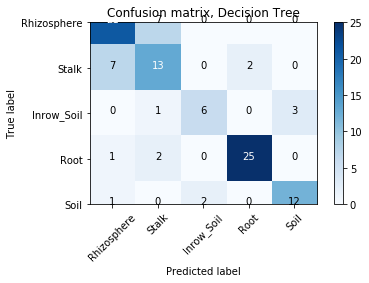

In [59]:
# Classifiers:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_features, train_labels)
y_pred_dt = clf_dt.predict(test_features)
print('Decision Tree Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_dt)))


cm_dt = confusion_matrix(test_labels, y_pred_dt, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_dt)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_dt, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Decision Tree')
plt.savefig('fig1.png')

report_dt = classification_report(test_labels, y_pred_dt, output_dict=True)
report_dt = pd.DataFrame(report_dt).transpose()
report_dt.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_dt.csv", index = True, header=True)

print("")

# Random Forest
clf_rf = RandomForestClassifier(n_estimators=10000, random_state=18, max_features = 'sqrt',n_jobs=-1, verbose = 0)
clf_rf.fit(train_features, train_labels)
y_pred_rf = clf_rf.predict(test_features)
print('Random Forest Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_rf)))

print("")
cm_rf = confusion_matrix(test_labels, y_pred_rf, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_rf)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_rf, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Random Forest')
plt.savefig('fig2.png')

report_rf = classification_report(test_labels, y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_rf.csv", index = True, header=True)

print("")

#Gaussian Native Bayes
clf_nb = GaussianNB()
clf_nb.fit(train_features, train_labels)
y_pred_nb = clf_nb.predict(test_features)
print('Gaussian NB Accuracy: ' + str(metrics.accuracy_score(test_labels,y_pred_nb)))

print("")
cm_nb = confusion_matrix(test_labels, y_pred_nb, labels=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'])
print(cm_nb)
plt.figure(figsize=(6,4))
plot_confusion_matrix(cm_nb, classes=['Rhizosphere', 'Stalk', 'Inrow_Soil', 'Root', 'Soil'],
                      title='Confusion matrix, Gaussian Native Bayes')
plt.savefig('fig3.png')

report_nb = classification_report(test_labels, y_pred_nb, output_dict=True)
report_nb = pd.DataFrame(report_nb).transpose()
report_nb.to_csv ("/Users/kivanc/DataMining-ML/Projects/report_nb.csv", index = True, header=True)

print("")

In [61]:
df.head()

,060fdbbfa61cbfb4d47350dc2a2019cd,d2208d27b5df4c53eb547f7ac45f4d6b,574d164310944193d8fc13dc10346e58,8cb92babedb9f4ff7bedee4ac4f47370,3e00a33b844a56c2e00acedeffc43b5e,0f5f7693288de84f4ade2e6abaa2440f,561ed5d9dab98c645f731a40b7b63fa4,a6d4742d8c802171498b62b6d79b1764,4eec9def757597c7f029b9a887619b37,271b576cc1f2ce84b35d8374ed909db4,...,Mn_ppm,Mo_ppm,Na_ppm,Ni_ppm,P_ppm,Pb_ppm,Zn_ppm,Organic_Matter_perc,N_perc,Sampling_NumberGDD
0,161,0,0,0,0,99,0,5,0,82,...,5.30,0.020,6.93,2.28,40.37,0.66,4.27,3.29,0.17,8600.0
1,323,0,0,0,0,54,0,22,2,53,...,31.63,0.020,5.24,0.91,75.20,0.26,6.98,2.28,0.08,111400.0
2,196,0,0,0,0,676,0,16,2,119,...,29.02,0.025,8.92,0.41,35.41,0.06,10.39,3.32,0.10,241400.0
3,205,0,0,0,12,194,0,7,5,88,...,31.68,0.025,10.73,2.24,23.77,0.35,3.90,3.03,0.11,291400.0
4,2678,0,0,16,0,677,0,23,9,884,...,9.10,0.020,12.64,1.74,35.20,1.17,1.75,1.44,0.07,131400.0


In [ ]:
# Model Evaluation - Kivanc
# Compare dt to random forest? - Corey test scaled data, 
# Cross Validation? - Kun-Lin
